In [1]:
import pandas as pd
import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
import random
import string
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh


full_filename = "../data/by_article_fulltext_020920.jl"



print("done")

done


In [3]:
# get full text dataset as a df
full_df = imp.init_df(full_filename, "full")

full_df.head(3)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,1996-10-18,8:00 am,"by welcome to ""tooling up,"" a monthly column about job hunting and career development for sci...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",30,1,1996,59,no,yes
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,1996-12-20,0:00 am,"by 've always hated the term ""cover letter."" it implies that the letter you send out to acco...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",93,4,1996,59,no,yes
2,5840,dressing scientists for success: male case study,"[tooling up, advice, graduate, postdoc, academic, industry, americas]",peter fiske,1997-09-26,8:00 am,"by e all know that, with respect to fashion, the world holds a rather dim view of scientists...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",373,13,1997,59,no,yes


In [4]:
full_df = cls.clean_text_df(full_df)
person_automated = cls.designate_person_from_df(full_df)

processed1
lemmatized


In [5]:
full_df["person_automated"] = person_automated

In [6]:
full_df["person_automated"].value_counts()

third     3774
first     1266
second    1084
Name: person_automated, dtype: int64

In [ ]:
# original:

# third: 3851
# second: 1239
# first: 1034

In [7]:
# counts_df = pronouns(full_dict)

# counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
# counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

In [8]:
#

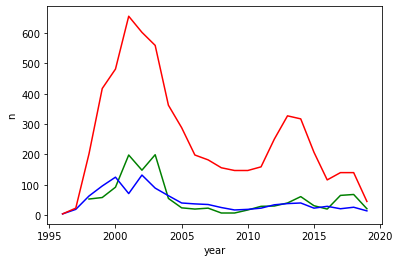

In [9]:
# based on classifier model

first_df = full_df[full_df.person_automated == "first"]
second_df = full_df[full_df.person_automated == "second"]

first_vis = vis.prep_per(first_df, group_by="year")
first_vis = first_vis[first_vis["year"]<2020]
second_vis = vis.prep_per(second_df, group_by="year")
second_vis = second_vis[second_vis["year"]<2020]
full_vis = vis.prep_per(full_df, group_by = "year")
full_vis = full_vis[full_vis["year"]<2020]

sns.lineplot(x = "year", y = "n", color = "green", data=first_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=second_vis)
sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

# plt.savefig("../figs/by_classifier_over_time.png")

In [5]:
full_advice = "../data/genre_advice_full_021520.jl"

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", advice=True)
# advice_df = advice_df[advice_df["year"]<2020]

print("done")

done


In [11]:
advice_df.head()

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2
0,2173,the tooling up book club: on the market,"[tooling up, advice, graduate, postdoc, academic, americas]",peter fiske,1998-01-30,0:00 am,"by ow that the holiday season is over, you have returned to your regular life, in the lab, i...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",18,1,1998,56,no,yes
1,2206,self-assessment exercises: a gre for your ego and superego,"[tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...",peter fiske,1998-02-27,0:00 am,by --miguel de cervantes any young scientists who explore nontraditional careers are seeking...,"[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",46,2,1998,56,no,yes
2,2207,it's april and i still don't have a job! the panicked scientist's guide to accelerated job searches,"[tooling up, advice, early career, graduate, undergraduate, academic, government, industry, amer...",peter fiske,1998-03-27,0:00 am,by t's 3 a.m. you've been at the bench for 18 hours finishing up your final set of thesis or...,"[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",74,3,1998,56,no,yes
3,2211,dysfunctional advisee-adviser relationships: methods for negotiating beyond conflict,"[tooling up, advice, graduate, government, industry, americas]",peter fiske,1998-04-24,8:00 am,"by n the career-development workshops and lectures i lead, i can always spot a few of them. ...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",102,4,1998,56,no,yes
4,2210,tooling up book club: alternative careers in science: leaving the ivory tower,"[tooling up, advice, early career, graduate, postdoc, other, industry, americas]",peter fiske,1998-05-22,8:00 am,"by ow do i learn about nontraditional careers?"" one of the biggest obstacles facing scientis...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",130,5,1998,56,no,yes


In [22]:
advice_df = cls.clean_text_df(advice_df)
person_automated = cls.designate_person_from_df(advice_df)
advice_df["person_automated"] = person_automated
advice_df["person_automated"].value_counts()

processed1
lemmatized


third     1249
second     757
first      358
Name: person_automated, dtype: int64

In [ ]:
# original

# third     1291
# second     817
# first      256

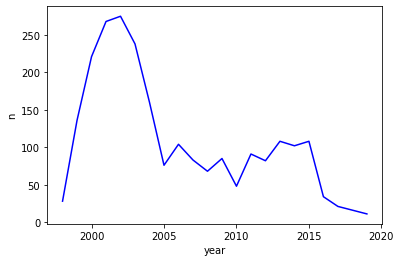

In [7]:
advice_df = advice_df[advice_df["year"]<2020]

advice_vis = vis.prep_per(advice_df, group_by="year")

sns.lineplot(x = "year", y = "n", color = "blue", data=advice_vis)
sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)


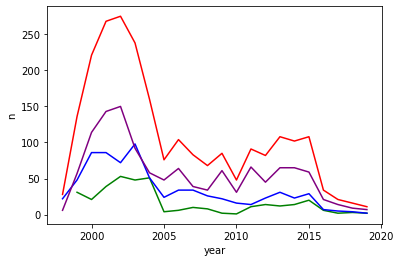

In [25]:
a_first_df = advice_df[advice_df.person_automated == "first"]
a_second_df = advice_df[advice_df.person_automated == "second"]
a_third_df = advice_df[advice_df.person_automated == "third"]

first_vis = vis.prep_per(a_first_df, group_by="year")
# first_vis = first_vis[a_first_vis["year"]<2020]
second_vis = vis.prep_per(a_second_df, group_by="year")
# second_vis = second_vis[second_vis["year"]<2020]
third_vis = vis.prep_per(a_third_df, group_by="year")
# third_vis = third_vis[third_vis["year"]<2020]
advice_vis = vis.prep_per(advice_df, group_by = "year")
# advice_vis = full_vis[advice_vis["year"]<2020]

sns.lineplot(x = "year", y = "n", color = "green", data=first_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=second_vis)
sns.lineplot(x = "year", y = "n", color = "purple", data=third_vis)

sns.lineplot(x = "year", y = "n", color = "red", data=advice_vis)

In [8]:
counts_df = clh.pronouns(advice_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_df.head()

,id,year,first,second,wc,frac1,frac2
0,0,1998,4,15,1080,0.003704,0.013889
1,1,1998,6,62,1743,0.003442,0.035571
2,2,1998,15,91,1717,0.008736,0.052999
3,3,1998,28,55,1889,0.014823,0.029116
4,4,1998,16,6,295,0.054237,0.020339


In [10]:

counts_plot_df = counts_df.groupby("year").average()

counts_plot_df = counts_plot_df.reset_index()

# if test == True:
#     print(df.head())
#     sns.lineplot(x = w_x, y = "n", color = color, data = df)   
#     plt.pyplot.show()

# counts_plot_df

AttributeError: 'DataFrameGroupBy' object has no attribute 'average'

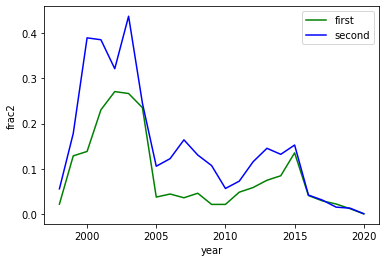

In [28]:
sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts_plot_df)
# sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

# plt.savefig("../figs/person_advice.png")